#6. 따릉이

서울 열린데이터 광장에서 제공하는 서울시 공공자전거 이용현황 데이터.  

* **Data1 : 서울특별시 공공자전거 대여소 정보**  
서울특별시 공공자전거 대여소 정보  
서울특별시 공공자전거 대여소(따릉이) 현황정보  
대여소의 이름, 관리번호, 위치정보와, 거치대수 정보를 제공


* **Data2 : 서울특별시 공공자전거 대여소별 이용정보(월별)**  
서울특별시 공공자전거 대여소별 대여, 반납 정보  
년월, 대여소번호, 대여소명, 대여건수, 반납건수 정보를 제공  
(Data2의 경우, 대여소그룹 컬럼을 제거한 것을 활용)

* **Data3 : 서울특별시 공공자전거 이용정보(시간대별)**
서울특별시 공공자전거 시간대별 이용정보  
대여일시, 대여시간, 대여소번호, 대여소명, 정기권유무, 성별, 연령대, 탄소량, 이동거리, 이동시간 정보를 제공

이용건수: 해당 시간대에 대여한 건수의 합  
그룹명 없음, 대여소명 없음, 정비센터 등인 경우 테스트 및 정비 목적이므로 분석에 제외하여 활용할 것

* Data from:  서울 열린데이터 광장 (http://data.seoul.go.kr/dataList/OA-14994/F/1/datasetView.do)



---



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#마이너스 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정
#폰트 설치 경로를 이용하여 폰트 이름 찾기
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path).get_name()

#폰트 설정
plt.rc('font', family=font_name)

In [2]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [4]:
bike1 = pd.read_csv('/content/drive/MyDrive/Data/2. 실습자료/Ch 06_파이썬 실습 따릉이/공공자전거 대여소 정보(21.01.31 기준).csv', encoding='cp949')
bike2 = pd.read_csv('/content/drive/MyDrive/Data/2. 실습자료/Ch 06_파이썬 실습 따릉이/공공자전거 대여소별 이용정보_2020.07_2021.01.csv', encoding='cp949')
bike3 = pd.read_csv('/content/drive/MyDrive/Data/2. 실습자료/Ch 06_파이썬 실습 따릉이/공공자전거 이용정보(시간대별)_21.01.csv', encoding='cp949')

In [5]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [6]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소
번호     2154 non-null   int64  
 1   보관소(대여소)명  2154 non-null   object 
 2   자치구        2154 non-null   object 
 3   상세주소       2154 non-null   object 
 4   위도         2042 non-null   float64
 5   경도         2042 non-null   float64
 6   설치
시기      2152 non-null   object 
 7   거치대수_LCD   1482 non-null   float64
 8   거치대수_QR    671 non-null    float64
 9   운영
방식      2154 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 168.4+ KB


In [7]:
bike1.describe()

,대여소\n번호,위도,경도,거치대수_LCD,거치대수_QR
count,2154.000000,2042.000000,2042.000000,1482.000000,671.000000
mean,1613.504643,37.548125,126.989775,12.699055,13.180328
std,1051.699853,0.051829,0.088977,4.735529,5.078662
min,101.000000,37.430977,126.798599,5.000000,5.000000
25%,744.250000,37.505814,126.917050,10.000000,10.000000
50%,1445.500000,37.547921,127.001419,10.000000,10.000000
75%,2309.750000,37.577998,127.058075,15.000000,15.000000
max,4791.000000,37.689720,127.180267,40.000000,40.000000


In [8]:
bike3.describe(include = np.object)

<ipython-input-8-4bde8a949280>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bike3.describe(include = np.object)


,대여일자,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량
count,718857,718857,718857,401235,718857,718857,718857
unique,30,2188,4,4,7,51422,1333
top,2021-01-25,2102. 봉림교 교통섬,정기권,M,20대,0.00,0.00
freq,47304,1799,585211,262477,270097,73806,74193


* 이동거리/평균사용시간이 높은 대여소는?
* 운동량과 이동거리의 상관관계는?
* 따릉이를 가장 많이 이용하는 성별은?
* 서울시 구별 설치 거치대의 개수는?
* 서울시 구별로 거치대 개수와 대여건수는?

In [9]:
bike1.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수_LCD,거치대수_QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [10]:
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

In [11]:
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,2303. 논현역 7번출구,202007,863
3,2304. 신영 ROYAL PALACE 앞,202007,334
4,2305. MCM 본사 직영점 앞,202007,436


In [12]:
bike1 = bike1.drop(['상세주소', '위도', '경도'], axis = 1, inplace = False)

In [13]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,NaN,LCD


In [14]:
bike1['거치대수lcd']  = bike1['거치대수lcd'].fillna(0)
bike1['거치대수qr'] = bike1['거치대수qr'].fillna(0)

In [15]:
bike3['대여소명'].str.split('.', expand = True).head()

,0,1,2,3
0,1347,길음래미안아파트817동 상가 앞,None,None
1,1349,월계2교 버스정류장 앞,None,None
2,1168,마곡엠밸리10단지 앞,None,None
3,2619,석촌고분역 4번출구,None,None
4,536,행당역 2번출구 앞,None,None


In [16]:
bike3['대여소명_new'] = bike3['대여소명'].str.split('.', expand=True)[1]

In [17]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [18]:
bike2['대여소번호'] = bike2['대여소 명'].str.split('.', expand=True)[0]
bike2['대여소명_new'] = bike2['대여소 명'].str.split(',', expand=True)[1]

In [19]:
bike22 = bike2.dropna(subset=['대여소명_new'])

In [20]:
bike22

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
55,"2359. 국립국악중,고교 정문 맞은편",202007,801,2359,고교 정문 맞은편
104,"2419.봉은사역 1,2번 출구",202007,442,2419,2번 출구
199,"1501. 미아역 3번,4번 출구 사이",202007,1924,1501,4번 출구 사이
223,"1533. 번동 주공3, 4단지 교차로",202007,2068,1533,4단지 교차로
294,"1153. 발산역 1번, 9번 인근 대여소",202007,6166,1153,9번 인근 대여소
...,...,...,...,...,...
14119,"2626.경찰병원역 1,2번 출구 사이",202101,214,2626,2번 출구 사이
14211,"773.염창역 3, 4번 출구 사이",202101,473,773,4번 출구 사이
14220,"785.양천구청, 보건소 사잇길",202101,794,785,보건소 사잇길
14342,"4605. 노들섬 다목적홀(동쪽) 숲, 앞",202101,176,4605,앞


In [21]:
print('성별 : ', bike3['성별'].unique())

성별 :  [nan 'F' 'M' 'f' 'm']


In [22]:
print(bike3.index[bike3['성별'] == 'f'].tolist())

[7808, 24746, 45007, 46395, 48380, 66354, 71677, 75473, 78155, 80457, 96544, 101821, 104531, 118882, 122485, 128396, 134396, 150443, 205772, 236672, 239190, 288590, 290411, 341184, 371849, 400683, 403902, 447215, 478674, 517347, 524624, 524871, 545539, 557501, 560106, 587555, 587556, 588588, 620227, 620232, 644223, 645362, 665774, 702135, 713171, 717515]


In [23]:
bike3['성별'][(bike3['성별'] == 'f')] = 'F'
bike3['성별'][(bike3['성별'] == 'm')] = 'M'
print('성별: ', bike3['성별'].unique())

성별:  [nan 'F' 'M']


<ipython-input-23-54e6657efaa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike3['성별'][(bike3['성별'] == 'f')] = 'F'
<ipython-input-23-54e6657efaa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike3['성별'][(bike3['성별'] == 'm')] = 'M'


In [24]:
print(bike1['대여소번호'].dtypes)

int64


In [25]:
bike1['대여소번호'] = bike1['대여소번호'].astype(object)

In [26]:
print(bike3['운동량'].dtypes)
print(bike3['탄소량'].dtypes)

object
object


In [27]:
bike3['운동량'][(bike3['운동량'] == r'\N')] = -1
bike3['탄소량'][(bike3['탄소량'] == r'\N')] = -1

<ipython-input-27-ea219d31a8a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike3['운동량'][(bike3['운동량'] == r'\N')] = -1
<ipython-input-27-ea219d31a8a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike3['탄소량'][(bike3['탄소량'] == r'\N')] = -1


In [28]:
bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])

In [29]:
print(bike3['대여일자'])

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
718852   2021-01-31
718853   2021-01-31
718854   2021-01-31
718855   2021-01-31
718856   2021-01-31
Name: 대여일자, Length: 718857, dtype: datetime64[ns]


In [30]:
bike3.groupby(['대여소명_new'])['이동거리'].mean().reset_index().sort_values(
    by='이동거리', ascending=False).head(3)

,대여소명_new,이동거리
887,석수역1번출구 앞 (SK주유소),9621.651079
439,독산보도육교 앞 자전거 보관소,9151.768862
1187,옥수역 3번출구,8606.456614


In [31]:
bike3.groupby(['대여소명_new'])['사용시간'].mean().reset_index().sort_values(
    by='사용시간', ascending=False).head(3)

,대여소명_new,사용시간
1654,IBK기업은행 석수역 지점 앞,81.609756
1123,여의도중학교 옆,74.242489
1118,여의나루역 1번출구 앞,70.088000


In [32]:
bike3['운동량'] = bike3['운동량'].astype(float)

In [33]:
bike3['운동량'].dtype

dtype('float64')

운동량, 이동거리 상관관계

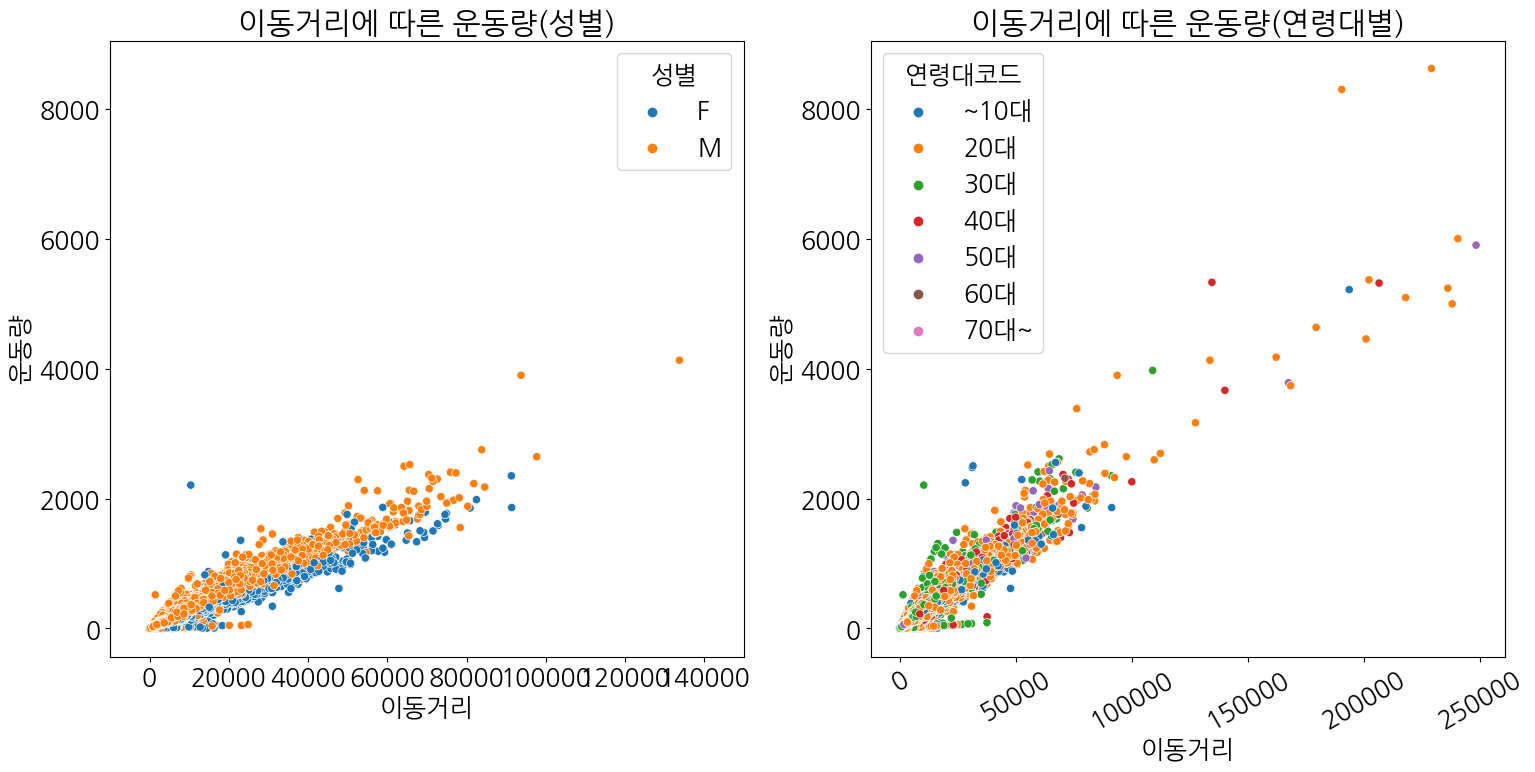

In [59]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[0], hue='성별')
ax[0].set_xlim(-10000, 150000)
plt.xticks(rotation=90)
ax[0].set_title('이동거리에 따른 운동량(성별)')


sns.scatterplot(data=bike3, x='이동거리', y='운동량',ax=ax[1], hue='연령대코드')
plt.xticks(rotation=30)

ax[1].set_title('이동거리에 따른 운동량(연령대별)')
plt.show()

대여 일에 따른 남녀 대여 건수 비교

In [35]:
bike3['대여년'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [36]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new,대여년,대여월,대여일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞,2021,1,1
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞,2021,1,1
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞,2021,1,1
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구,2021,1,1
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞,2021,1,1


In [37]:
bike3.pivot_table(index=bike3['대여일'], columns = bike3['성별'], values='사용시간', aggfunc=sum)

성별,F,M
대여일,,
1,154530,234399
2,153598,234173
3,131245,217678
4,156668,267946
5,122408,222853
6,95435,166657
7,15144,45589
8,23995,66331
9,31465,82345


<Axes: title={'center': '일별 자전거 대여수'}, xlabel='대여일'>

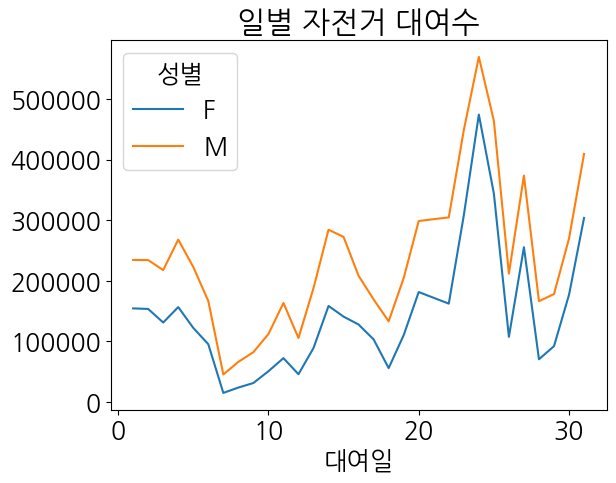

In [38]:
bike_fm = bike3.pivot_table(index=bike3['대여일'], columns = bike3['성별'], values = '사용시간', aggfunc = sum)
bike_fm.plot(title='일별 자전거 대여수', rot=0)

구별 거치대 개수 지도로 표현

In [39]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD


In [40]:
bike1['총거치대수'] = bike1['거치대수lcd'] + bike1['거치대수qr']

In [41]:
bike_sum1 = bike1.groupby(['자치구'])[('총거치대수')].sum().reset_index()
bike_sum1 = bike_sum1.set_index('자치구')
bike_sum1.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [42]:
import json
import folium
import warnings

geo_path = '/content/drive/MyDrive/Data/2. 실습자료/Ch 06_파이썬 실습 따릉이/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

[대한민국 folium json map](https://krksap.tistory.com/1751)은 여기서 다운받을 수 있음

In [43]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '39020',
    'name': '서귀포시',
    'name_eng': 'Seogwipo-si',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[126.1701670531016, 33.27833920373795],
      [126.17796199822318, 33.28904450342792],
      [126.20366562455006, 33.292582069125935],
      [126.23227804627976, 33.28054651709448],
      [126.27081469983565, 33.29305651947374],
      [126.28692516789717, 33.3095121006344],
      [126.32582807936741, 33.32307849544494],
      [126.33863040850332, 33.33700002289742],
      [126.37692773779688, 33.34348978209229],
      [126.42008790072302, 33.33448285889923],
      [126.43967991919219, 33.34042205120408],
      [126.44742456956253, 33.35529267692266],
      [126.4918716225209, 33.351283204155564],
      [126.54001194569452, 33.35949354681064],
      [126.55310458705854, 33.368769331336765],
      [126.5830715764017, 33.368027779973275],
      [126.65655971322

In [45]:
seoul_bike1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles = 'Stamen Toner')

seoul_bike1.choropleth(
    geo_data = geo_str,
    data = bike_sum1['총거치대수'],
    columns = ['자치구','총거치대수'],
               fill_color = 'YlGnBu',
               key_on = 'feature.properties.name',
               legend_name='Number of Parking lots (%)')

seoul_bike1

구별 대여건수 지도로 표현

In [46]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여소번호    2154 non-null   object 
 1   대여소명     2154 non-null   object 
 2   자치구      2154 non-null   object 
 3   설치시기     2152 non-null   object 
 4   거치대수lcd  2154 non-null   float64
 5   거치대수qr   2154 non-null   float64
 6   운영방식     2154 non-null   object 
 7   총거치대수    2154 non-null   float64
dtypes: float64(3), object(5)
memory usage: 134.8+ KB


In [47]:
bike22['대여소번호'] = pd.to_numeric(bike22['대여소번호'])

<ipython-input-47-4e3474b75ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike22['대여소번호'] = pd.to_numeric(bike22['대여소번호'])


In [48]:
bike_merge = pd.merge(bike1, bike22, left_on = '대여소번호', right_on='대여소번호')

In [49]:
bike_merge.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수,대여소 명,대여 일자 / 월,대여 건수,대여소명_new
0,4702,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,2020-07-21,0.0,5.0,QR,5.0,"4702. 평창동 꽃여울(꽃집),스타벅스 앞",202009,149,스타벅스 앞
1,4702,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,2020-07-21,0.0,5.0,QR,5.0,"4702. 평창동 꽃여울(꽃집),스타벅스 앞",202010,163,스타벅스 앞
2,4702,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,2020-07-21,0.0,5.0,QR,5.0,"4702. 평창동 꽃여울(꽃집),스타벅스 앞",202011,139,스타벅스 앞
3,4702,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,2020-07-21,0.0,5.0,QR,5.0,"4702. 평창동 꽃여울(꽃집),스타벅스 앞",202012,84,스타벅스 앞
4,4702,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,2020-07-21,0.0,5.0,QR,5.0,"4702. 평창동 꽃여울(꽃집),스타벅스 앞",202101,47,스타벅스 앞


In [50]:
bike_merge = bike_merge.drop(['설치시기', '대여소 명'], axis = 1, inplace = False)

In [51]:
bike_merge01 = bike_merge[bike_merge['대여 일자 / 월'] == 202101]

In [52]:
bike_merge01.head(5)

,대여소번호,대여소명,자치구,거치대수lcd,거치대수qr,운영방식,총거치대수,대여 일자 / 월,대여 건수,대여소명_new
4,4702,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,0.0,5.0,QR,5.0,202101,47,스타벅스 앞
6,4605,"노들섬 다목적홀(동쪽) 숲, 앞",용산구,0.0,10.0,QR,10.0,202101,176,앞
13,1501,"미아역 3번,4번 출구 사이",강북구,9.0,0.0,LCD,9.0,202101,473,4번 출구 사이
20,1533,"번동 주공3, 4단지 교차로",강북구,10.0,0.0,LCD,10.0,202101,417,4단지 교차로
27,1735,"도봉역 1,2번 출구사이 건너편",도봉구,13.0,0.0,LCD,13.0,202101,219,2번 출구사이 건너편


In [53]:
bike_sum2 = bike_merge01.groupby(['자치구'])[('대여 건수')].sum().reset_index()
bike_sum2 = bike_sum2.set_index('자치구')

In [54]:
seoul_bike2 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='openstreetmap')

seoul_bike2.choropleth(
    geo_data = geo_str,
    data = bike_sum2['대여 건수'],
    columns = [bike_sum2.index,bike_sum2['대여 건수']],
               fill_color = 'PuRd',
               key_on = 'feature.properties.name')

seoul_bike2

* 따릉이 데이터:  
석수역1번 출구 앞 (SK주유소)	에서 대여한 따릉이의 이동거리가 가장 큼, IBK기업은행 석수역 지점 앞	대여소 따릉이의 이용시간이 가장 김.  
* 따릉이를 이용한 남녀 간 이동거리 분포에 큰 차이는 없었으나, 남성의 운동량이 좀 더 많게 나타남
* 따릉이를 많이 이용하는 성별은?:  전반적으로 남성이 여성보다 따릉이를 더 많이 이용(대여건수 기준).